In [1]:
%reset -f
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
dirToInclude=parentdir +'/features/'
print dirToInclude
sys.path.insert(0,dirToInclude) 

import IeegConsts
from IeegConsts import *
from IeegFeatures import *

import pandas
import numpy as np
import pandas as pd
from sklearn import cross_validation
from sklearn import metrics
from sklearn.metrics import roc_auc_score, log_loss, roc_auc_score, roc_curve, auc
from sklearn.cross_validation import StratifiedKFold, ShuffleSplit, cross_val_score, train_test_split
import matplotlib.pyplot as plt
import pandas
from scipy.stats import norm, invgamma
from sklearn import linear_model
import numpy as np
import scipy.sparse
import pickle
import xgboost as xgb
import pandas
from scipy.stats import norm, invgamma
from sklearn import linear_model
import numpy as np
import scipy.sparse
import pickle
import xgboost as xgb

currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

%matplotlib inline

np.set_printoptions(precision=4, threshold=10000, linewidth=100, edgeitems=999, suppress=True)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 100)
pd.set_option('expand_frame_repr', False)
pd.set_option('precision', 6)
    
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 
import pandas
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
# #http://rcarneva.github.io/understanding-gradient-boosting-part-1.html
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesRegressor, ExtraTreesClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier

#-------------------------MLEXTND-------------------------------#
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
import numpy as np

import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
dirToInclude=parentdir +'/features/'
print dirToInclude
sys.path.insert(0,dirToInclude) 

import IeegConsts
from IeegConsts import *
from IeegFeatures import *

import pandas
import numpy as np
import pandas as pd
from sklearn import cross_validation
from sklearn import metrics
from sklearn.metrics import roc_auc_score, log_loss, roc_auc_score, roc_curve, auc
from sklearn.cross_validation import StratifiedKFold, ShuffleSplit, cross_val_score, train_test_split
import matplotlib.pyplot as plt
import pandas
from scipy.stats import norm, invgamma
from sklearn import linear_model
import numpy as np
import scipy.sparse
import pickle
import xgboost as xgb
import pandas
from scipy.stats import norm, invgamma
from sklearn import linear_model
import numpy as np
import scipy.sparse
import pickle
import xgboost as xgb

currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 
import pandas
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
# #http://rcarneva.github.io/understanding-gradient-boosting-part-1.html
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesRegressor, ExtraTreesClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier

#-------------------------MLEXTND-------------------------------#
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
import numpy as np

    
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

train_dir=TRAIN_DATA_FOLDER_IN_ALL
test_dir=TEST_DATA_FOLDER_IN_ALL    

ieegFeatures= IeegFeatures(train_dir, True)
df_cols_train=ieegFeatures.ieegGenCols()
print len(df_cols_train)

def dropBadFiles(df):
    print df.shape
    bad_files = pandas.read_csv("train_and_test_data_labels_safe.csv", engine='python')

    print 'Start shape:' + str(df.shape)
    for index, row in bad_files.iterrows():
        safe = str(row['safe'])  # file name
        if safe=='0':
            f_name = row['image']  # file name
            # print 'droping:' + str(f_name)
            df = df.drop(df[df.file ==f_name].index)

    print 'Final shape:' + str(df.shape)
    return df

# F_NAME_TRAIN= TRAIN_FEAT_BASE + TRAIN_PREFIX_ALL +'-feat_TRAIN_df.csv'
# X_df_train=pandas.read_csv(F_NAME_TRAIN, engine='python') 
# X_df_train.drop('Unnamed: 0', axis=1, inplace=True)
# X_df_train.to_hdf(TRAIN_FEAT_BASE + TRAIN_PREFIX_ALL 
#                   + 'X_df_train.hdf', 'data',format='fixed',complib='blosc',complevel=9)


X_df_train= pd.read_hdf(TRAIN_FEAT_BASE + TRAIN_PREFIX_ALL 
                  + 'X_df_train.hdf', 'data',format='fixed',complib='blosc',complevel=9)

X_df_train_SINGLE=X_df_train.copy(deep=True)
X_df_train_SINGLE = dropBadFiles(X_df_train_SINGLE)

answers_1_SINGLE = list (X_df_train_SINGLE[singleResponseVariable].values)
answers_1_SINGLE= map(int, answers_1_SINGLE)
X_df_train_SINGLE = X_df_train_SINGLE.drop(singleResponseVariable, axis=1)
X_df_train_SINGLE.drop('id', axis=1, inplace=True)
X_df_train_SINGLE.drop('file', axis=1, inplace=True)
X_df_train_SINGLE.drop('patient_id', axis=1, inplace=True)
X_df_train_SINGLE.drop('file_size', axis=1, inplace=True)
X_df_train_SINGLE.drop('sequence_id', axis=1, inplace=True)
X_df_train_SINGLE.drop('segment', axis=1, inplace=True)
X_df_train_SINGLE=X_df_train_SINGLE.apply(lambda x: pandas.to_numeric(x, errors='ignore'))
X_df_train_SINGLE.head(3)

/Volumes/3pt-enc/db/Dropbox/dev/books/mf-msc/mcmc2/seizure-33/python/features/
/Volumes/3pt-enc/db/Dropbox/dev/books/mf-msc/mcmc2/seizure-33/python/features/
Starting:ieegFeatures:2016-11-12 12:45:14.108860
Cols:1239
1239
(5971, 1239)
Start shape:(5971, 1239)
Final shape:(4699, 1239)


,mean_1,mean_2,mean_3,mean_4,mean_5,mean_6,mean_7,mean_8,mean_9,mean_10,mean_11,mean_12,mean_13,mean_14,mean_15,mean_16,median_1,median_2,median_3,median_4,median_5,median_6,median_7,median_8,median_9,median_10,median_11,median_12,median_13,median_14,median_15,median_16,std_1,std_2,std_3,std_4,std_5,std_6,std_7,std_8,std_9,std_10,std_11,std_12,std_13,std_14,std_15,std_16,skew_1,skew_2,skew_3,skew_4,skew_5,skew_6,skew_7,skew_8,skew_9,skew_10,skew_11,skew_12,skew_13,skew_14,skew_15,skew_16,kurt_1,kurt_2,kurt_3,kurt_4,kurt_5,kurt_6,kurt_7,kurt_8,kurt_9,kurt_10,kurt_11,kurt_12,kurt_13,kurt_14,kurt_15,kurt_16,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,m6_1,m6_2,m6_3,m6_4,m6_5,m6_6,m6_7,m6_8,m6_9,m6_10,m6_11,m6_12,m6_13,m6_14,m6_15,m6_16,m4_1,m4_2,m4_3,m4_4,m4_5,m4_6,m4_7,m4_8,m4_9,m4_10,m4_11,m4_12,m4_13,m4_14,m4_15,m4_16,psd_1,psd_2,psd_3,psd_4,psd_5,psd_6,psd_7,psd_8,psd_9,psd_10,psd_11,psd_12,psd_13,psd_14,psd_15,psd_16,psd_17,psd_18,psd_19,psd_20,psd_21,psd_22,psd_23,psd_24,psd_25,psd_26,psd_27,psd_28,psd_29,psd_30,psd_31,psd_32,psd_33,psd_34,psd_35,psd_36,psd_37,psd_38,psd_39,psd_40,psd_41,psd_42,psd_43,psd_44,psd_45,psd_46,psd_47,psd_48,psd_49,psd_50,psd_51,psd_52,psd_53,psd_54,psd_55,psd_56,psd_57,psd_58,psd_59,psd_60,psd_61,psd_62,psd_63,psd_64,psd_65,psd_66,psd_67,psd_68,psd_69,psd_70,psd_71,psd_72,psd_73,psd_74,psd_75,psd_76,psd_77,psd_78,psd_79,psd_80,psd_81,psd_82,psd_83,psd_84,psd_85,psd_86,psd_87,psd_88,psd_89,psd_90,psd_91,psd_92,psd_93,psd_94,psd_95,psd_96,psd_97,psd_98,psd_99,psd_100,psd_101,psd_102,psd_103,psd_104,psd_105,psd_106,psd_107,psd_108,psd_109,psd_110,psd_111,psd_112,psd_113,psd_114,psd_115,psd_116,psd_117,psd_118,psd_119,psd_120,psd_121,psd_122,psd_123,psd_124,psd_125,psd_126,psd_127,psd_128,psd_129,psd_130,psd_131,psd_132,psd_133,psd_134,psd_135,psd_136,psd_137,psd_138,psd_139,psd_140,psd_141,psd_142,psd_143,psd_144,psd_145,psd_146,psd_147,psd_148,psd_149,psd_150,psd_151,psd_152,psd_153,psd_154,psd_155,psd_156,psd_157,psd_158,psd_159,psd_160,psd_161,psd_162,psd_163,psd_164,psd_165,psd_166,psd_167,psd_168,psd_169,psd_170,psd_171,psd_172,psd_173,psd_174,psd_175,psd_176,psd_177,psd_178,psd_179,psd_180,psd_181,psd_182,psd_183,psd_184,psd_185,psd_186,psd_187,psd_188,psd_189,psd_190,psd_191,psd_192,AR_1,AR_2,AR_3,AR_4,AR_5,AR_6,AR_7,AR_8,AR_9,AR_10,AR_11,AR_12,AR_13,AR_14,AR_15,AR_16,AR_17,AR_18,AR_19,AR_20,AR_21,AR_22,AR_23,AR_24,AR_25,AR_26,AR_27,AR_28,AR_29,AR_30,AR_31,AR_32,AR_33,AR_34,AR_35,AR_36,AR_37,AR_38,AR_39,AR_40,AR_41,AR_42,AR_43,AR_44,AR_45,AR_46,AR_47,AR_48,AR_49,AR_50,AR_51,AR_52,AR_53,AR_54,AR_55,AR_56,AR_57,AR_58,AR_59,AR_60,AR_61,AR_62,AR_63,AR_64,AR_65,AR_66,AR_67,AR_68,AR_69,AR_70,AR_71,AR_72,AR_73,AR_74,AR_75,AR_76,AR_77,AR_78,AR_79,AR_80,AR_81,AR_82,AR_83,AR_84,AR_85,AR_86,AR_87,AR_88,AR_89,AR_90,AR_91,AR_92,AR_93,AR_94,AR_95,AR_96,AR_97,AR_98,AR_99,AR_100,AR_101,AR_102,AR_103,AR_104,AR_105,AR_106,AR_107,AR_108,AR_109,AR_110,AR_111,AR_112,AR_113,AR_114,AR_115,AR_116,AR_117,AR_118,AR_119,AR_120,AR_121,AR_122,AR_123,AR_124,AR_125,AR_126,AR_127,AR_128,AR_129,AR_130,AR_131,AR_132,AR_133,AR_134,AR_135,AR_136,AR_137,AR_138,AR_139,AR_140,AR_141,AR_142,AR_143,AR_144,AR_145,AR_146,AR_147,AR_148,AR_149,AR_150,AR_151,AR_152,AR_153,AR_154,AR_155,AR_156,AR_157,AR_158,AR_159,AR_160,AR_161,AR_162,AR_163,AR_164,AR_165,AR_166,AR_167,AR_168,AR_169,AR_170,AR_171,AR_172,AR_173,AR_174,AR_175,AR_176,AR_177,AR_178,AR_179,AR_180,AR_181,AR_182,AR_183,AR_184,AR_185,AR_186,AR_187,AR_188,AR_189,AR_190,AR_191,AR_192,AR_193,AR_194,AR_195,AR_196,AR_197,AR_198,AR_199,AR_200,AR_201,AR_202,AR_203,AR_204,AR_205,AR_206,AR_207,AR_208,AR_209,AR_210,AR_211,AR_212,AR_213,AR_214,AR_215,AR_216,AR_217,AR_218,AR_219,AR_220,AR_221,AR_222,AR_223,AR_224,AR_225,AR_226,AR_227,AR_228,AR_229,AR_230,AR_231,AR_232,AR_233,AR_234,AR_235,AR_236,AR_237,AR_238,AR_239,AR_240,AR_241,AR_242,AR_243,AR_244,AR_245,AR_246,AR_247,AR_248,AR_249,AR_250,AR_251,AR_252,AR_253,AR_254,AR_255,AR_256

# === Predictions === #
# When making predictions, retrain the model on the whole training set

(5971, 1239)
Start shape:(5971, 1239)
Final shape:(4699, 1239)
CV ROC AUC: 0.873542 (+/- 0.025236)
1:ROC AUC:0.845078215382
CV ROC AUC: 0.863958 (+/- 0.020892)
2:ROC AUC:0.900153609831
***:ROC AUC:0.900153609831
CV ROC AUC: 0.859367 (+/- 0.018536)
3:ROC AUC:0.859201157098
CV ROC AUC: 0.869062 (+/- 0.016412)
4:ROC AUC:0.889924463938
***:ROC AUC:0.889924463938
CV ROC AUC: 0.864933 (+/- 0.015645)
5:ROC AUC:0.890368213023
***:ROC AUC:0.890368213023
CV ROC AUC: 0.862686 (+/- 0.021571)
6:ROC AUC:0.890791632486
***:ROC AUC:0.890791632486
CV ROC AUC: 0.865162 (+/- 0.017025)
7:ROC AUC:0.912585282651
***:ROC AUC:0.912585282651
CV ROC AUC: 0.872472 (+/- 0.028252)
8:ROC AUC:0.880836601307
***:ROC AUC:0.880836601307
CV ROC AUC: 0.871166 (+/- 0.003563)
9:ROC AUC:0.853885951447
CV ROC AUC: 0.868112 (+/- 0.030145)
10:ROC AUC:0.856449001619
CV ROC AUC: 0.864698 (+/- 0.008893)
11:ROC AUC:0.895041050903
***:ROC AUC:0.895041050903
CV ROC AUC: 0.866103 (+/- 0.012865)
12:ROC AUC:0.854936874403
CV ROC AUC: 0

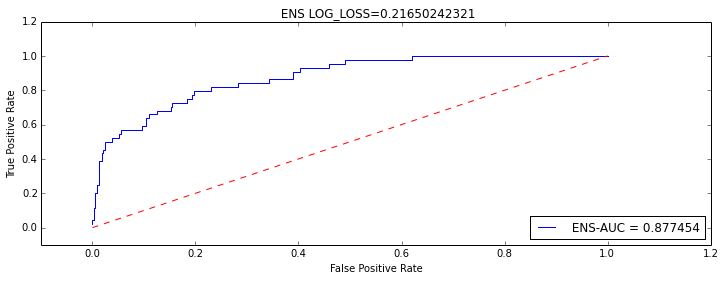

In [3]:
cols = list()
n=n_16
for i in range(1, n + 1):
    cols.append('mean_{}'.format(i))
# for i in range(1, n + 1):
#     cols.append('median_{}'.format(i))
# for i in range(1, n + 1):
#     cols.append('std_{}'.format(i))
# for i in range(1, n + 1):
#     cols.append('skew_{}'.format(i))
# for i in range(1, n + 1):
#     cols.append('kurt_{}'.format(i))
for i in range(1, n + 1):
    cols.append('var_{}'.format(i))
# for i in range(1, n + 1):
#     cols.append('m6_{}'.format(i))
# for i in range(1, n + 1):
#     cols.append('m4_{}'.format(i))
for i in range(1, n_psd + 1):
    cols.append('psd_{}'.format(i))
# for i in range(1, n_AR + 1):
#     cols.append('AR_{}'.format(i))
for i in range(1, n_corr_coeff + 1):
    cols.append('corcoef_{}'.format(i))
# for i in range(1, n + 1):
#     cols.append('hurst_{}'.format(i))
# for i in range(1,  n_plv+ 1):
#     cols.append('plv_{}'.format(i))
# for i in range(1, n_p_corr + 1):
#     cols.append('cpc_{}'.format(i))

last_cols=cols

def get_best_estimator_by_grid_search(train_X, train_y, modelType):
    params_lr = {'penalty': ['l2'], 'C': [1,2,5,10,50,500,5000],
                 'solver': ['newton-cg'],
                 'fit_intercept': [False, True]}
    model_lg = LogisticRegression()

    if modelType=='lr':
        method=model_lg
        params=params_lr
    print 'running grid:' + str(params)

    gscv = grid_search.GridSearchCV(method, params, scoring='roc_auc', cv=4)
    gscv.fit(train_X, train_y)
    for params, mean_score, all_scores in gscv.grid_scores_:
        print('{:.6f} (+/- {:.6f}) for {}'.format(mean_score, all_scores.std() / 2, params))
    print('params:{params}'.format(params=gscv.best_params_))
    print('score:{params}'.format(params=gscv.best_score_))
    return gscv.best_params_


X_df_train= pd.read_hdf(TRAIN_FEAT_BASE + TRAIN_PREFIX_ALL 
                  + 'X_df_train.hdf', 'data',format='fixed',complib='blosc',complevel=9)

X_df_train_SINGLE=X_df_train.copy(deep=True)
X_df_train_SINGLE=dropBadFiles(X_df_train_SINGLE)
X_df_train_SINGLE=X_df_train_SINGLE.sort(['id'], ascending=[True])
X_df_train_SINGLE=X_df_train_SINGLE.sort(['patient_id','sequence_id'], ascending=[True,True])

answers_1_SINGLE = list (X_df_train_SINGLE[singleResponseVariable].values)
answers_1_SINGLE= map(int, answers_1_SINGLE)

X_df_train_SINGLE.drop('id', axis=1, inplace=True)
X_df_train_SINGLE.drop('file', axis=1, inplace=True)
X_df_train_SINGLE.drop('patient_id', axis=1, inplace=True)
# X_df_train = X_df_train.loc[X_df_train['file_size'] > 2000000]
X_df_train_SINGLE.drop('file_size', axis=1, inplace=True)
X_df_train_SINGLE.drop('sequence_id', axis=1, inplace=True)
X_df_train_SINGLE.drop('segment', axis=1, inplace=True)

X_df_train_SINGLE = X_df_train_SINGLE.drop(singleResponseVariable, axis=1)
X_df_train_SINGLE=X_df_train_SINGLE[last_cols]
X_df_train_SINGLE=X_df_train_SINGLE.apply(lambda x: pandas.to_numeric(x, errors='ignore'))    

from skbayes import linear_models
from skbayes.linear_models.bayes_logistic import *

clfs=[]
clf_labels= []
max_iter=2000
max_algos=10
TARGET_R_SCORE=0.86

for i in range (1,max_iter):   
    r_state=87*14*36*47*i 
    
    trainX, testX, trainY, testY = train_test_split(X_df_train_SINGLE, answers_1_SINGLE, test_size=.10, 
                                                    random_state=r_state*i)  # CV, 14, 19, 39              
#     lr_best_params_x=get_best_estimator_by_grid_search(trainX, trainY,'lr')
    lr_best_params = {'penalty': 'l2', 'C': 100, 'solver': 'newton-cg', 'fit_intercept': True}
    lr3=LogisticRegression(**lr_best_params)
    
    scores = cross_val_score(estimator=lr3,X=trainX,y=trainY,cv=5,scoring='roc_auc')
    print("CV ROC AUC: %0.6f (+/- %0.6f)"% (scores.mean(), scores.std()))    
    lr3.fit(trainX,trainY)        
#     lr3.fit(X_df_train_SINGLE,answers_1_SINGLE)
    predictions = lr3.predict_proba(testX)[:, 1]
    R_SCORE=roc_auc_score(testY, predictions)        
    print str(i) +':ROC AUC:' + str(R_SCORE)
#     print 'LOG LOSS:' + str(log_loss(testY, predictions))
    if R_SCORE>=TARGET_R_SCORE:
        max_algos=max_algos -1
        clfs.append(lr3)
        clf_labels.append('lr_' + str(r_state)) 
        print str('***') +':ROC AUC:' + str(R_SCORE)
        if max_algos==0:
            print 'Complted 5 good folds'
            break
            
            
from MVC import *        
eclf_B = MajorityVoteClassifier(classifiers=clfs)
print eclf_B
# scores = cross_val_score(estimator=eclf_B,X=trainX,y=trainY,cv=5,scoring='roc_auc')
# print("ROC AUC: %0.6f (+/- %0.6f)"% (scores.mean(), scores.std()))
eclf_B.fit(trainX,trainY)
# eclf_B.fit(X_df_train_SINGLE,answers_1_SINGLE)
# roc_auc=(scores.mean())  
predictions = eclf_B.predict_proba(testX)[:, 1]
# R_SCORE=roc_auc_score(testY, predictions)   
# print 'Ensemble ROC AUC:' + str(R_SCORE)

print 'ENS ROC AUC:' + str(roc_auc_score(testY, predictions))
print 'ENS LOG LOSS:' + str(log_loss(testY, predictions))
false_positive_rate, true_positive_rate, thresholds = roc_curve(testY, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title(' ENS LOG_LOSS=' + str(log_loss(testY, predictions)))
plt.plot(false_positive_rate, true_positive_rate, 'b', label=' ENS-AUC = %0.6f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.1, 1.2])
plt.ylim([-0.1, 1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## All patients as one submission

In [5]:
algo_= eclf_B
# algo_=algo_xgbm

# algo_= clf
# algo_= lr3
# algo_=algo_xgbm

ieegFeatures= IeegFeatures(test_dir, False)
df_cols_test=ieegFeatures.ieegGenCols()
print len(df_cols_test)
F_NAME_TEST= TEST_FEAT_BASE + TEST_PREFIX_ALL +'-feat_TEST_df.csv'
X_df_TEST=pandas.read_csv(F_NAME_TEST, engine='python') 
X_df_TEST.drop('Unnamed: 0', axis=1, inplace=True)
X_df_TEST.drop('file', axis=1, inplace=True)
X_df_TEST.drop('patient_id', axis=1, inplace=True)
X_df_TEST.head(3)

#------------------------------------------------------------------------------#
now = datetime.now()
import dis
fld='submission/' + str(datetime.now().strftime("%Y-%m-%d-%H-%M-%S")) +'/'
if not os.path.exists(fld):
    os.makedirs(fld)


# --------------------------------------------------------
    #       PATIENT ID
    # --------------------------------------------------------
def getIdFromFileName(id_str):
    arr = id_str.split("_")
#     print arr
    patient = int(arr[1])
#     print patient
    p_id_str = str(arr[2])
#     print p_id_str
    p_id = int((p_id_str)[:-4])
#     print p_id
    new_id = [patient * 100000 + p_id]
    return new_id    
    
sub_file = fld + 'submission_' + str(roc_auc) + '_'  + (str(algo_))[0:12] + '_'  + str(len(last_cols)) +'_feat_' + '.csv'
# sub_file = fld + 'submission_' + str(.73) + '_'  + (str(algo_))[0:12] + '_'  + '.csv'
r= pandas.DataFrame.from_csv('sample_submission.csv')
print('Writing submission: ', sub_file)
f = open(sub_file, 'w') # append mode
f.write('File,Class\n')

total = 0
for index, row in r.iterrows():            
    id_str= index     
    arr = id_str.split("_")
    patient = int(arr[1])        
    new_id= getIdFromFileName(id_str) 
#     print str(new_id)
    
    X_df_single_row=X_df_TEST.loc[X_df_TEST['id'] == new_id]
#     print X_df_single_row
    X_df_single_row.drop('id', axis=1, inplace=True)
    X_df_single_row=X_df_single_row[last_cols]
#     X_df_single_row=X_df_single_row[glm_factor]
    pred_X_df_single_row= algo_.predict_proba(X_df_single_row)    
    c_pred=pred_X_df_single_row[:, 1] # is the probability of the label being 1 
#         print c_pred
    str1 = id_str + ',' + str(c_pred[0]) + '\n'                
    
    f.write(str1)
    
f.close()

print('Done writing submission: ', sub_file)

Starting:ieegFeatures:2016-11-12 13:37:18.831741
Cols:1235
1235
('Writing submission: ', 'submission/2016-11-12-13-37-20/submission_0.877454118651_MajorityVote_344_feat_.csv')
('Done writing submission: ', 'submission/2016-11-12-13-37-20/submission_0.877454118651_MajorityVote_344_feat_.csv')


In [ ]:
# X_df_train_SINGLE_ONE=X_df_train_SINGLE.loc[X_df_train_SINGLE[singleResponseVariable] ==1]
# X_df_train_SINGLE_ONE=X_df_train_SINGLE_ONE.sort(['patient_id', 'sequence_id'], ascending=[True, True])

# # print X_df_train_SINGLE_ONE.shape

# X_df_train_SINGLE_ZERO=X_df_train_SINGLE.loc[X_df_train_SINGLE[singleResponseVariable] ==0]
# X_df_train_SINGLE_ZERO=X_df_train_SINGLE_ZERO.sort(['patient_id', 'sequence_id'], ascending=[True, True])

# print X_df_train_SINGLE_ZERO.shape

# t_cols_ONE=X_df_train_SINGLE_ONE.shape[0]
# max_col_ONE=int(np.floor(0.9* t_cols_ONE))
# trainX_ONE=X_df_train_SINGLE_ONE[0:max_col_ONE]
# testX_ONE=X_df_train_SINGLE_ONE[max_col_ONE+1:t_cols_ONE]
# trainY_ONE=trainX_ONE[singleResponseVariable]
# testY_ONE=testX_ONE[singleResponseVariable]
# trainX_ONE=trainX_ONE[last_cols]        
# testX_ONE=testX_ONE[last_cols]        
# print trainX_ONE.shape

# t_cols_ZERO=X_df_train_SINGLE_ZERO.shape[0]
# max_col_ZERO=int(np.floor(0.9* t_cols_ZERO))
# trainX_ZERO=X_df_train_SINGLE_ZERO[0:max_col_ZERO]
# testX_ZERO=X_df_train_SINGLE_ONE[max_col_ZERO+1:t_cols_ZERO]
# trainY_ZERO=trainX_ZERO[singleResponseVariable]
# testY_ZERO=testX_ZERO[singleResponseVariable]
# trainX_ZERO=trainX_ZERO[last_cols]        
# testX_ZERO=testX_ZERO[last_cols]        
# print trainX_ZERO.shape

# trainX=np.vstack([trainX_ONE])
# trainX=np.vstack([trainX_ZERO])
# trainX=pandas.DataFrame(trainX, columns=last_cols)
# trainX.drop(trainX.head(1).index, inplace=True)
# # x_all =[0] * (totalCols -3)
# # trainX.head(5)

# trainY=np.vstack([trainY_ONE])
# trainY=np.vstack([trainY_ZERO])

# testX=np.vstack([testX_ONE])
# testX=np.vstack([testX_ZERO])
# testX=pandas.DataFrame(testX, columns=last_cols)
# testX.drop(testX.head(1).index, inplace=True)